
# Maven Data Modeling Exercise
###### Theresa Locklear, September 2019
Hello and thank you for the opportunity to review the sample Maven dataset. 

For this exercise, three files were provided `users.csv`, `events.csv` and `events-2017.csv`. The `booking` event was described as the conversion event Maven analysts are looking to better understand. I will load each of the datasets in to observe their attributes

## users.csv 

Each row is this dataset represents a user from a sample dataset. Let's get a quick count of size...


In [9]:
import pandas as pd
data_users = pd.read_csv('users.csv')
df_users = pd.DataFrame(data_users) 
print ("(Rows, Columns)")
df_users.shape


(Rows, Columns)


(200000, 6)

Let's take a look at the data. First to load some libraries that I might need

In [6]:
df_users.describe()

,first_name,last_name,user_id
count,200000.0,200000.0,2.000000e+05
mean,1.0,2.0,5.004855e+10
std,0.0,0.0,2.881756e+10
min,1.0,2.0,5.774010e+05
25%,1.0,2.0,2.517460e+10
50%,1.0,2.0,5.001542e+10
75%,1.0,2.0,7.501618e+10
max,1.0,2.0,9.999959e+10


In [7]:
#check for nulls
df_users.isnull().any()

first_name      False
last_name       False
emailAddress    False
user_id         False
joined_at       False
country         False
dtype: bool

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>

In [8]:
#what are the data types of the columns
df_users.dtypes

first_name       int64
last_name        int64
emailAddress    object
user_id          int64
joined_at       object
country         object
dtype: object

let's do the same for the other files
## events.csv

In [10]:
data_events = pd.read_csv('events.csv')
df_events = pd.DataFrame(data_events) 
print ("(Rows, Columns)")
df_events.shape


(Rows, Columns)


(160078, 4)

In [11]:
df_events.describe()

,$id
count,1.600780e+05
mean,1.289408e+11
std,3.748654e+08
min,1.282932e+11
25%,1.286155e+11
50%,1.289418e+11
75%,1.292649e+11
max,1.295900e+11


interesting that there are 4 columns and only 1 is being represented by the describe() function. Maybe the field name starting with a special character is causing an issue. 

In [12]:
df_events.isnull().any()

$id           False
user-email    False
when          False
blob          False
dtype: bool

In [13]:
df_events.dtypes

$id            int64
user-email    object
when          object
blob          object
dtype: object

Let's take a look at 

## events-2017.csv


In [14]:
data_events2 = pd.read_csv('events-2017.csv')
df_events2 = pd.DataFrame(data_events2) 
print ("(Rows, Columns)")
df_events2.shape

(Rows, Columns)


(37848, 6)

In [19]:
df_events2.describe()

,"{""email"": ""1.2.8029@example.com""","""EVENT"": ""provider-select""","""when"": ""2017-04-08 21:03:06""","""HTTP_USER_AGENT"": ""Mozilla/5.0 (iPad; CPU iPad OS 10_3_4 like Mac OS X) AppleWebKit/534.0 (KHTML","like Gecko) CriOS/45.0.857.0 Mobile/26Y768 Safari/534.0""","""EVENT_ID"": ""f9359330-44fc-4185-bf7f-ac064a0fd7ae""}"
count,37848,37848,37848,37848,37848,16659
unique,5448,5,25265,4958,16958,11169
top,"{""email"": ""1.2.2579@example.com""","""EVENT"": ""login""","""when"": ""2017-03-17 04:03:09""","""HTTP_USER_AGENT"": ""Mozilla/5.0 (compatible; ...","like Gecko) Chrome/42.0.893.0 Safari/532.1""","""EVENT_ID"": ""84ecb02a-649a-4de1-9c6a-db5cf024..."
freq,39,12648,5,89,28,4


Looks like events-2017.csv is JSON. Also looks like some of first events file is also json. 
In an effort to constrain this project to whether or not a user is booked or not, and which attributes may correlate to that, I will simplify the 2 events files with the following steps:
1. align fields from both files to 3 simple field
 - email (pk)
 - event
 - when (time of event)
2. align events labels between the 2 files by converting them to the newer terminology
 - provider-* (over practitioner)
 - scheduled --> schedule
3. remove rows of events from the first events file with labels that don't exist in the newer events file 
 - desktop-view
 - dashboard
4. union the 2 events files 
5. group users that have had a booking event, and give them a boolean attribute of 1 or 0 if they have or have not had a booking event
6. aggregate events for each email address
7. create a dataframe consisting of the above mentioned cleansed data
 - email
 - booking (1,0)
 - event1
 - event2
 - event3
 - event4

This resulted in a file called unioned_events, which I will now load and observe

## unioned_events
 

In [20]:
data_uevents = pd.read_csv('unioned_events.csv')
df_uevents = pd.DataFrame(data_uevents) 
print ("(Rows, Columns)")
df_uevents.shape

(Rows, Columns)


(9224, 7)

In [21]:
df_uevents.describe()

,Booked,login,provider-booked,provider-schedule,provider-search,provider-select
count,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000
mean,0.900911,3.615460,2.661969,6.291956,2.816132,3.340416
std,0.298798,2.663315,2.269160,5.147154,2.583825,2.583299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,1.000000,3.000000,2.000000,5.000000,2.000000,3.000000
75%,1.000000,5.000000,4.000000,9.000000,4.000000,5.000000
max,1.000000,23.000000,20.000000,37.000000,18.000000,19.000000


In [22]:
df_uevents.isnull().any()

User-Email           False
Booked               False
login                False
provider-booked      False
provider-schedule    False
provider-search      False
provider-select      False
dtype: bool

In [24]:
df_uevents.dtypes

User-Email           object
Booked                int64
login                 int64
provider-booked       int64
provider-schedule     int64
provider-search       int64
provider-select       int64
dtype: object

In [26]:
# import some libs for analysis
import numpy as np            # Data manipulation
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns


from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size

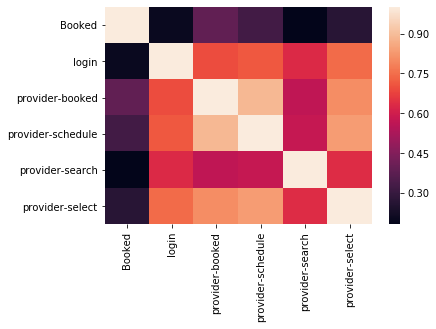

In [27]:
df1 = df_uevents[['Booked', 'login', 'provider-booked', 'provider-schedule', 
           'provider-search', 'provider-select', 
          ]] #Subsetting the data
cor = df1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = False, robust = True) #Plot the correlation as heat map

###### Analysis
Looks like there's not a clear correlation between any of the attributes in the data file. Next, I will perform a cluster analysis on the subset file

In [30]:
#Scaling the data
ss = StandardScaler()
ss.fit_transform(df1)

array([[ 0.33164434,  6.90325182,  7.64114178,  4.60629853,  4.71569374,
         5.67505999],
       [ 0.33164434,  4.65029851,  5.4375635 ,  5.96634702,  4.32864968,
         5.28793712],
       [ 0.33164434,  4.65029851,  4.99684785,  4.02342061,  2.39342941,
         4.12656854],
       ...,
       [-3.01527838, -0.60659253, -1.17317131, -1.2224807 , -0.31587897,
         0.64246279],
       [-3.01527838,  1.64636077, -1.17317131, -0.63960278, -0.31587897,
        -0.90602866],
       [-3.01527838, -0.98208475, -1.17317131, -0.63960278, -1.08996708,
        -0.90602866]])

In [31]:
#K means clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df1, 2)
kmeans = pd.DataFrame(clust_labels)
df1.insert((df1.shape[1]),'kmeans',kmeans)

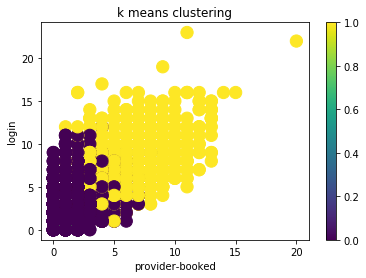

In [39]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['provider-booked'],df1['login'],
                     c=kmeans[0],s=150)
ax.set_title('k means clustering')
ax.set_xlabel('provider-booked')
ax.set_ylabel('login')
plt.colorbar(scatter)


looks like there is clustering of the data. Let's take a look at the predictive power of that cluster... 

In [40]:
#train=pd.read_csv('homer_user_detail.csv')
train=df1
train.head()

,Booked,login,provider-booked,provider-schedule,provider-search,provider-select,kmeans
0,1,22,20,30,15,18,1
1,1,16,15,37,14,17,1
2,1,16,14,27,9,14,1
3,1,9,13,21,6,13,1
4,1,13,13,31,12,13,1


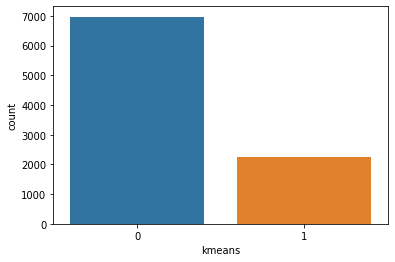

In [45]:
sns.countplot(x='kmeans',data=train)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('kmeans',axis=1), 
                                                    train['kmeans'], test_size=0.20, 
                                                    random_state=101)

In [70]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/Users/theresalocklear/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1385
           1       1.00      0.99      0.99       460

    accuracy                           1.00      1845
   macro avg       1.00      1.00      1.00      1845
weighted avg       1.00      1.00      1.00      1845



###### Result

Looks like there is predictive power in the clustering of the data. If given more attributes in the dataset, I would classify the data and leverage the kmeans cluster to evaluate the likelihood of bookings based on those attributes. 